In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/home/diana/Загрузки/_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [4]:
df = df[['ID  объявления', 'Балкон', 'Окна', 'Санузел', 'Можно с детьми/животными', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод', 'Ссылка на объявление']]

### Замена ru на eng

In [5]:
df = df.rename(columns={'ID  объявления' : 'ad_ID',
                        'Балкон' : 'balcony',
                        'Окна' : 'windows',
                        'Санузел' : 'bathroom',
                        'Можно с детьми/животными' : 'with_children/animals',
                        'Дополнительно' : 'additionally',
                        'Название ЖК' : 'name_of_the_RC',
                        'Серия дома' : 'house_series',
                        'Высота потолков, м' : 'ceiling_height_m',
                        'Лифт' : 'elevator',
                        'Мусоропровод' : 'garbage_chute',
                        'Ссылка на объявление' : 'link_to_the_ad'})

### Убираем NaN во всех objects

In [6]:
diff_celling_height = df.columns.difference(['ceiling_height_m', 'balcony'])
df[diff_celling_height] = df[diff_celling_height].fillna('н/д')

### Так как Ceiling_height_m во float. В качестве NaN берем среднее значение

In [7]:
df['ceiling_height_m'] = df['ceiling_height_m'].fillna(df['ceiling_height_m'].mean())

In [8]:
df['ceiling_height_m'] = df['ceiling_height_m'].round(2)

In [9]:
df['balcony'] = df['balcony'].fillna('0')

## Редактируем столбцы для удобства визуализации графиков

In [10]:
df['bathroom'] = df['bathroom'].map(lambda x: x.split()[0])

In [11]:
df['balcony'] = df['balcony'].map(lambda x: x.split()[0])

In [12]:
df.drop('link_to_the_ad', axis=1, inplace=True)

### Попробуем преобазовать "Additionally"

In [13]:
df['additionally'].values

array(['Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон',
       ...,
       'Мебель на кухне, Душевая кабина, Стиральная машина, Кондиционер, Холодильник, Интернет',
       'Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Кондиционер, Посудомоечная машина, Холодильник',
       'Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет'],
      dtype=object)

In [14]:
Often_additionally = ['Мебель в комнатах', 'Мебель на кухне', 'Интернет', 'Телевизор']
for furniture in Often_additionally:
    df[furniture] = df['additionally'].apply(lambda x: 1 if furniture in x else 0)
df.drop('additionally', axis=1, inplace=True)

### Преобразуем столбец "Elevator"

In [15]:
df['elevator'] = df['elevator'].str.replace(r'[()]', '', regex=True)

In [16]:
df['elevator'] = df['elevator'].str.replace(r'\d+', '', regex=True)

In [17]:
df['elevator'] = df['elevator'].str.replace(r' ', '', regex=True)

### Преобразование наименований ЖК

In [18]:
df['name_of_the_RC'] = df['name_of_the_RC'].str.replace(r'\d+', '', regex=True)
df['name_of_the_RC'] = df['name_of_the_RC'].str.replace(',', '', regex=True)

### Изменение названий столбцов в новых столбцах

In [19]:
df = df.rename(columns={'Мебель в комнатах' : 'furniture_rooms',
                   'Мебель на кухне' : 'furniture_kitchen',
                   'Интернет' : 'the_internet',
                   'Телевизор' : 'tv'})

In [20]:
df.to_csv('data_p2.csv', sep='\t')

In [21]:
df.head(3)

,ad_ID,balcony,windows,bathroom,with_children/animals,name_of_the_RC,house_series,ceiling_height_m,elevator,garbage_chute,furniture_rooms,furniture_kitchen,the_internet,tv
0,271271157,0,н/д,н/д,"Можно с детьми, Можно с животными",Новый Арбат,н/д,3.0,"Пасс,Груз",Да,1,1,1,1
1,271634126,0,На улицу и двор,Совмещенный,Можно с детьми,Новый Арбат,н/д,3.5,"Пасс,Груз",Нет,1,1,1,1
2,271173086,0,На улицу и двор,Совмещенный,Можно с детьми,Новый Арбат,н/д,3.2,Пасс,н/д,1,1,1,1


# Релиз 3.

In [22]:
super_df = pd.read_csv('/home/diana/Загрузки/data.csv')

In [32]:
# Небольшое исправление (видимо создала сама NaN случайно)
super_df['name_of_the_RC'] = super_df['name_of_the_RC'].fillna('н/д')
super_df['name_of_the_RC'].isna().sum()

np.int64(0)

## Повторное сравнение соотношения NaN к нормлаьным значениям

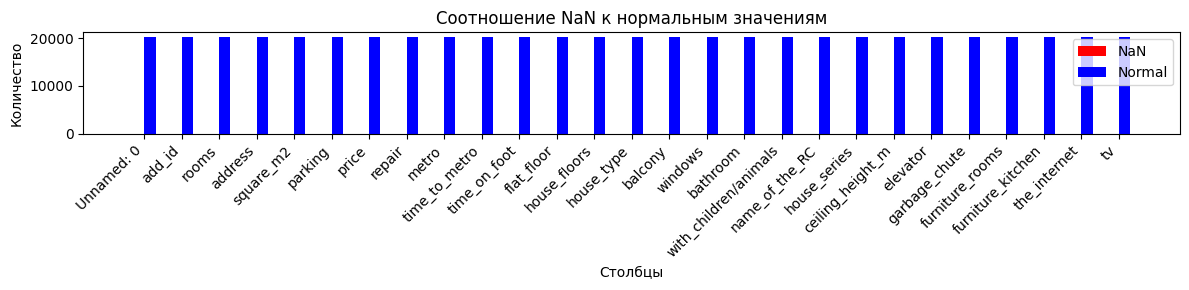

In [38]:
nan_df = super_df.isna().sum()
normal_df = super_df.notna().sum()
%matplotlib inline
plt.figure(figsize=(12, 3))
width = 0.3
indices = range(len(super_df.columns))

plt.bar(indices, nan_df, width=width, label='NaN', color='red')
plt.bar([i + width for i in indices], normal_df, width=width, label='Normal', color='blue')

plt.xlabel('Столбцы')
plt.ylabel('Количество')
plt.title('Соотношение NaN к нормальным значениям')
plt.xticks([i + width / 2 for i in indices], super_df.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Вывод: мы избавились от NaN-значений

## Дополнительно: (Анализ данных таблицы)

In [40]:
super_df.head()

,Unnamed: 0,add_id,rooms,address,square_m2,parking,price,repair,metro,time_to_metro,...,with_children/animals,name_of_the_RC,house_series,ceiling_height_m,elevator,garbage_chute,furniture_rooms,furniture_kitchen,the_internet,tv
0,0,271271157,4,"улица Новый Арбат, 27",200.0,подземная,500000.0,Дизайнерский,Смоленская,9,...,"Можно с детьми, Можно с животными",Новый Арбат,н/д,3.0,"Пасс,Груз",Да,1,1,1,1
1,1,271634126,4,"улица Новый Арбат, 27",198.0,подземная,500000.0,Дизайнерский,Смоленская,8,...,Можно с детьми,Новый Арбат,н/д,3.5,"Пасс,Груз",Нет,1,1,1,1
2,2,271173086,4,"улица Новый Арбат, 27",200.0,подземная,500000.0,Евроремонт,Смоленская,7,...,Можно с детьми,Новый Арбат,н/д,3.2,Пасс,н/д,1,1,1,1
3,3,272197456,4,"переулок Плотников, 21С1",170.0,подземная,400000.0,Евроремонт,Смоленская,3,...,Можно с животными,н/д,н/д,3.2,Пасс,н/д,1,1,1,1
4,4,273614615,2,"улица Новый Арбат, 15",58.0,нет,225000.0,Евроремонт,Арбатская,7,...,н/д,The Book,н/д,3.9,"Пасс,Груз",Да,1,1,1,1


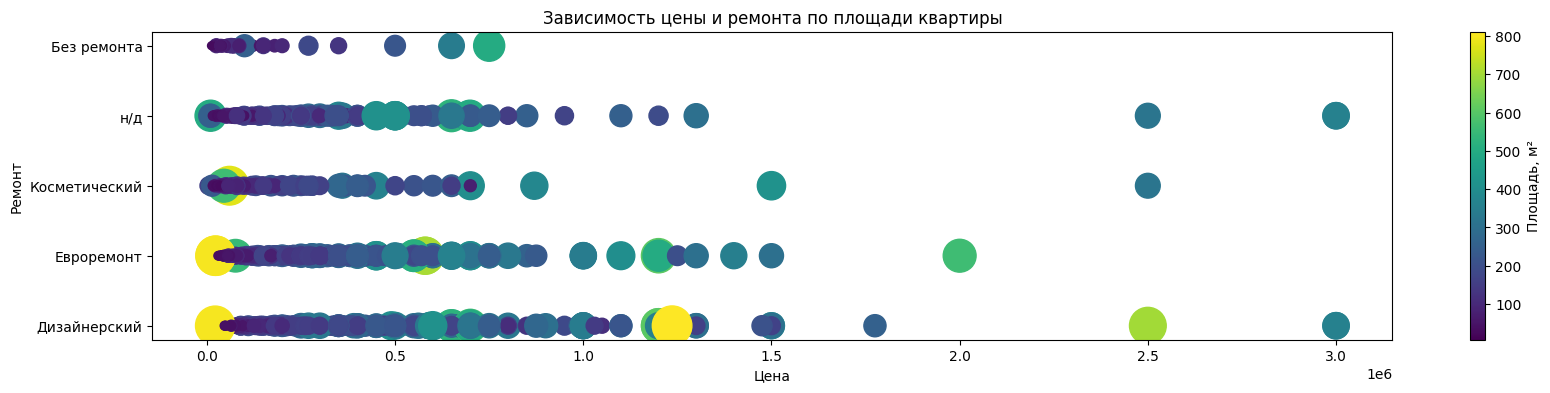

<Figure size 640x480 with 0 Axes>

In [113]:
%matplotlib inline
plt.figure(figsize=(20,4))
price_repair = plt.scatter(super_df['price'], super_df['repair'], s=super_df['square_m2'], c=super_df['square_m2'])
plt.colorbar(price_repair, label='Площадь, м²')
plt.title('Зависимость цены и ремонта по площади квартиры')
plt.xlabel('Цена')
plt.ylabel('Ремонт')
plt.show()
plt.savefig('price_repair.png')

### Вывод: наиболее высокая цена у дизайнерских квартир площадью от 500 до 700 м2

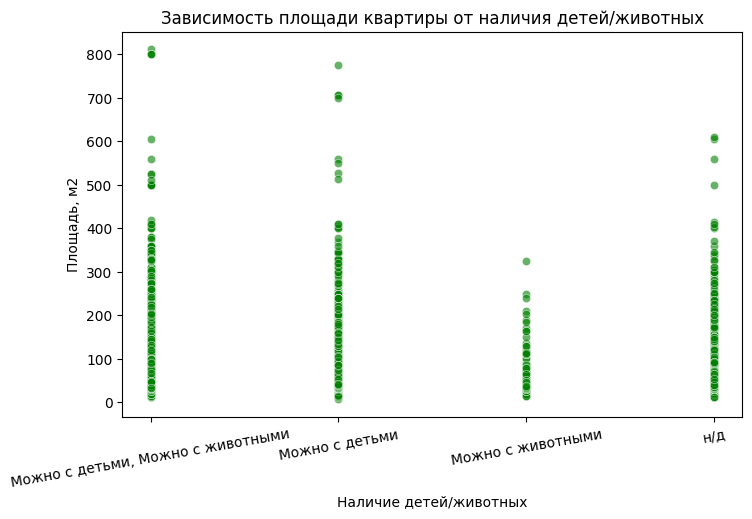

<Figure size 640x480 with 0 Axes>

In [112]:
%matplotlib inline
plt.figure(figsize=(8, 5))
child_animal_sq = sns.scatterplot(x='with_children/animals', y='square_m2', data=super_df, color='green', alpha=0.6)
plt.title('Зависимость площади квартиры от наличия детей/животных')
plt.xlabel('Наличие детей/животных')
plt.ylabel('Площадь, м2')
plt.xticks(rotation=10)
plt.show()

plt.savefig('child_animal_sq.png')

### Вывод: В больших по площади квартирах рекомендуется содержание детей и животных вместе. В небольших квартирах заводить животных не рекомендуется, исходя из даннных таблицы.

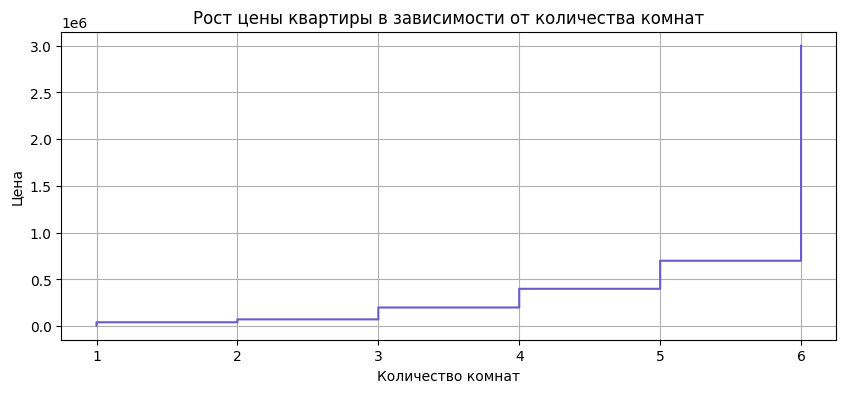

In [111]:
%matplotlib inline
plt.figure(figsize=(10,4))
rooms_price = plt.plot(super_df['rooms'].sort_values(), super_df['price'].sort_values(), color='slateblue')
plt.title('Рост цены квартиры в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid()
plt.savefig('rooms_price.png')

### Вывод: Чем больше комнат, тем дороже квартира

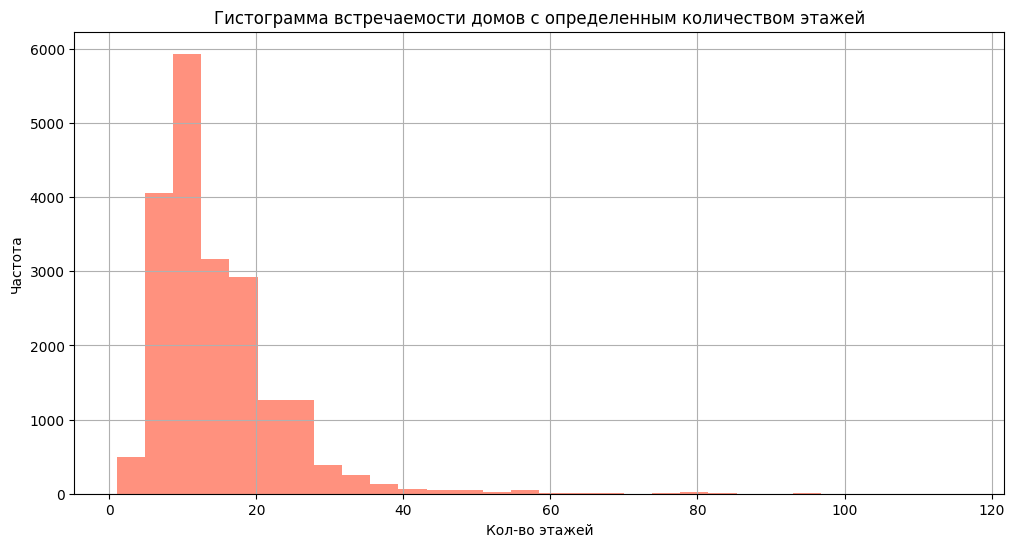

In [110]:
%matplotlib inline
plt.figure(figsize=(12, 6))
floors_hist = plt.hist(super_df['house_floors'], bins=30, alpha=0.7, color='tomato')

plt.xlabel('Кол-во этажей')
plt.ylabel('Частота')
plt.title('Гистограмма встречаемости домов с определенным количеством этажей')
plt.grid()
plt.savefig('floors_hist.png')

### Вывод: Больше домов с  количество этажей от 12 до 15ти.

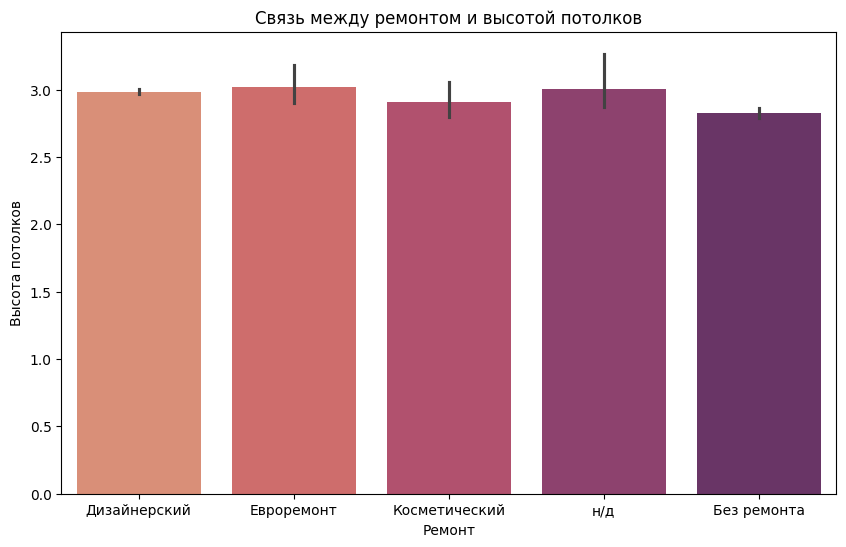

In [117]:
%matplotlib inline
plt.figure(figsize=(10,6))
reapir_h = sns.barplot(data=super_df, x='repair', y='ceiling_height_m', palette='flare', legend=False, hue='repair')

plt.xlabel('Ремонт')
plt.ylabel('Высота потолков')
plt.title('Связь между ремонтом и высотой потолков')
plt.savefig('reapir_h.png')

### Вывод: В квартирах без ремонта потолки ниже, чем в квартирах с евроремонтом, которые занимают лидирующую позицию по высоте потолков.